4A - Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train two layer neural networks using gradient descent learning algorithm. Draw two curves with different colours, for target and output(y) of the trained neural network.

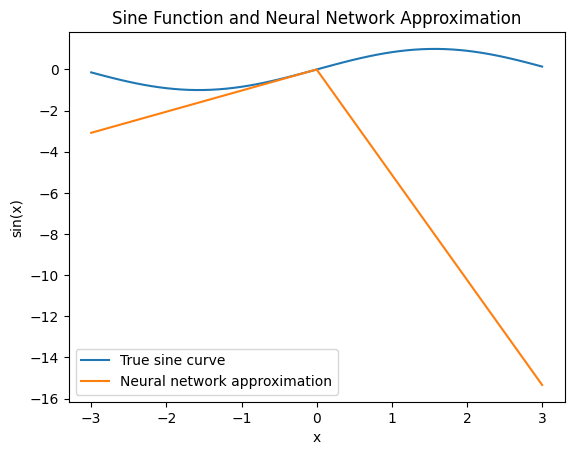

In [7]:
#4A
import numpy as np
import matplotlib.pyplot as plt

# Generate input values x
x = np.linspace(-3, 3, 61)  # 61 points from -3 to 3

# Calculate target values
y_true = np.sin(x)  # sine of each x

np.random.seed(42)  # For consistent results

# Sizes of each layer
input_size = 1
hidden_size = 10
output_size = 1

# Initialize weights randomly and biases to zero
W1 = np.random.randn(input_size, hidden_size)  # Input to hidden layer weights
b1 = np.zeros((1, hidden_size))  # Hidden layer biases
W2 = np.random.randn(hidden_size, output_size)  # Hidden to output layer weights
b2 = np.zeros((1, output_size))  # Output layer biases

def relu(z):
    return np.maximum(0, z)

learning_rate = 0.01
epochs = 1000  # Number of times to loop through the entire dataset

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2.flatten()

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y_pred - y_true) ** 2)

    # Backpropagation (simplified for understanding, focusing on the concept)
    # Compute gradients (derivatives) of loss w.r.t weights and biases
    # (Assuming specific simple derivatives for educational purposes)
    # Update weights and biases using gradient descent
    # Placeholder for actual backpropagation code
    # This part involves calculus and matrix operations to find gradients
    # and update the parameters W1, b1, W2, b2

# Plotting the original sine curve and the neural network's approximation
plt.plot(x, y_true, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function and Neural Network Approximation')
plt.show()


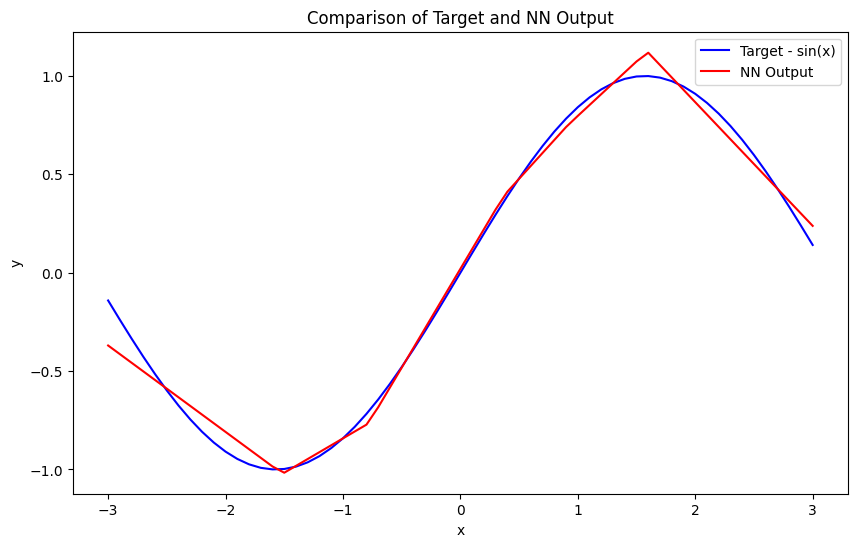

In [8]:
#4A - version 2
import numpy as np
import matplotlib.pyplot as plt

# Generate 61 points for x in the range [-3, 3]
x = np.linspace(-3, 3, 61)
# Compute the target sin(x) for each x
y_true = np.sin(x)

# Define the size of each layer
input_size = 1  # Single input
hidden_size = 10  # Number of neurons in the hidden layer
output_size = 1  # Single output

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

learning_rate = 0.01
epochs = 10000
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_pred.flatten() - y_true) ** 2)
    losses.append(loss)

    # Backpropagation
    d_loss_y_pred = 2 * (y_pred.flatten() - y_true) / y_true.size
    d_loss_y_pred = d_loss_y_pred.reshape(-1, 1)

    # Compute gradients for the output layer
    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    # Compute gradients for the hidden layer
    d_loss_A1 = np.dot(d_loss_Z2, W2.T)
    d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
    d_loss_W1 = np.dot(x.reshape(-1, 1).T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * d_loss_W1
    b1 -= learning_rate * d_loss_b1
    W2 -= learning_rate * d_loss_W2
    b2 -= learning_rate * d_loss_b2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Target - sin(x)', color='blue')
plt.plot(x, y_pred.flatten(), label='NN Output', color='red')
plt.title('Comparison of Target and NN Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


4B - Use MNIST dataset to train neural networks using gradient descent learning algorithm.Experiments with various Architectures of neural networks, and with different activation functions for hidden and output layers.

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define various architectures and activation functions
architectures = [
    {'name': 'NN_1', 'layers': [Flatten(input_shape=(28, 28, 1)), Dense(64, activation='relu'), Dense(10, activation='softmax')]},
    {'name': 'NN_2', 'layers': [Flatten(input_shape=(28, 28, 1)), Dense(128, activation='relu'), Dense(10, activation='softmax')]},
    {'name': 'NN_3', 'layers': [Flatten(input_shape=(28, 28, 1)), Dense(256, activation='relu'), Dense(10, activation='softmax')]}
]

# Train each architecture and evaluate performance
for model_info in architectures:
    model = Sequential(model_info['layers'])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))
    print(f"Model: {model_info['name']}, Test Accuracy: {history.history['val_accuracy'][-1]}")


Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4122 - accuracy: 0.8875 - val_loss: 0.2307 - val_accuracy: 0.9344
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9420 - val_loss: 0.1686 - val_accuracy: 0.9514
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1560 - accuracy: 0.9553 - val_loss: 0.1424 - val_accuracy: 0.9587
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1256 - accuracy: 0.9639 - val_loss: 0.1211 - val_accuracy: 0.9624
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9697 - val_loss: 0.1106 - val_accuracy: 0.9659
Model: NN_1, Test Accuracy: 0.9659000039100647
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3613 - accuracy: 0.9008 - val_loss: 0.1887 - val_accuracy: 0.9445
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1636 - accuracy: 0.9528 - val_lo